# RiceLeaf Disease Detection

#### Introduction

**Problem and brief solution**

The impact of rice plant disease had led to a 37% annual drop in rice production. It may happen basically due to the lack of knowledge in identifying and controlling rice plant diseases. Farmers may use advancemennts in technology to diagnose rice disease, which would be a highly effective solution to these problems. Many studies are new being undertaken on the use of Deep learning technologies to diagnose such disorders. Several studies employes deep learning concepts and approaches, while others built their own techniques to  handle this issue.

According to author's best of knowledge, they have identifies various rice leaf disease, among those diseases some already widespread in some countries. But some of those diseases are unique to Sri Lanka "Pecky rice", "Grain spotting", "Leaf scald", “Root-knot”, “Narrow Brown Leaf spot”, “Bacterial blight”, “False smut”, “Sheath rot”, “Bacterial leaf streak”, “Rice blast”, “Rice sheath blight” are some common types of rice plant diseases.


 In order to identify rice plant disease by an application itself, Convulutional Neural Network (CNN) can be used. Many of researchers have used CNNs for plant disease identification because of their accuracy in image identification and classfication.

According to the litreature review which was conducted by the authors, they were able to identify some common and popular CNN models which have been used to identify rice plant disease which are known as VGG 16, InceptionV3, MobileNet, and ResNet 50.


**Steps to taken:**
  1. Data Collection
  2. EDA
  3. Data Preprocessing
  4. Model Building
  5. Evaluation
  6. Save best model for prediction


#### Dataset source


Dataset link: https://d3ilbtxij3aepc.cloudfront.net/projects/CDS-Capstone-Projects/PRCP-1001-RiceLeaf.zip

#### Important Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import random
import cv2
from PIL import Image
from os import listdir


# Ignore the warnings
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import keras
import tensorflow as tf
from keras.utils import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical
from keras.models import Sequential
from keras import optimizers
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense
from keras import layers
from keras.models import Model
from keras.models import load_model
from keras.optimizers import SGD
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping


# Pre-trained Model
from keras.applications.vgg16 import VGG16
from keras.applications.inception_v3 import InceptionV3
from keras.applications.resnet import ResNet50
from keras.applications.mobilenet_v2 import MobileNetV2
from keras.applications import EfficientNetB7


In [3]:
np.random.seed(42)
tf.random.set_seed(42)

#### Basic checks

Import dataset

In [4]:
os.listdir("D:\Internship\Rubixe\Rice Leaf Disease Detection\End-to-End-Rice-leaf-Disease-Detection\Dataset")

['Bacterial leaf blight', 'Brown spot', 'Leaf smut']

In [5]:
# define folder path
folder_path = 'D:\Internship\Rubixe\Rice Leaf Disease Detection\End-to-End-Rice-leaf-Disease-Detection\Dataset'

# create a function to load all the images
def load_images_from_folder(folder_path, class_name,target_size=(224,224)):
    images = []
    class_path = os.path.join(folder_path, class_name)
    for image_file in os.listdir(class_path):
        image_path = os.path.join(class_path, image_file)
        img = Image.open(image_path).resize(target_size)
        images.append((np.array(img), class_name))
    return images

# save images according to category
images_dir1 = load_images_from_folder(folder_path, 'Bacterial leaf blight')
images_dir2 = load_images_from_folder(folder_path, 'Brown spot')
images_dir3 = load_images_from_folder(folder_path, 'Leaf smut')

check first 5 images

In [6]:
no_of_samples = 5

dir1_set = images_dir1[:no_of_samples]
dir2_set = images_dir2[:no_of_samples]
dir3_set = images_dir3[:no_of_samples]

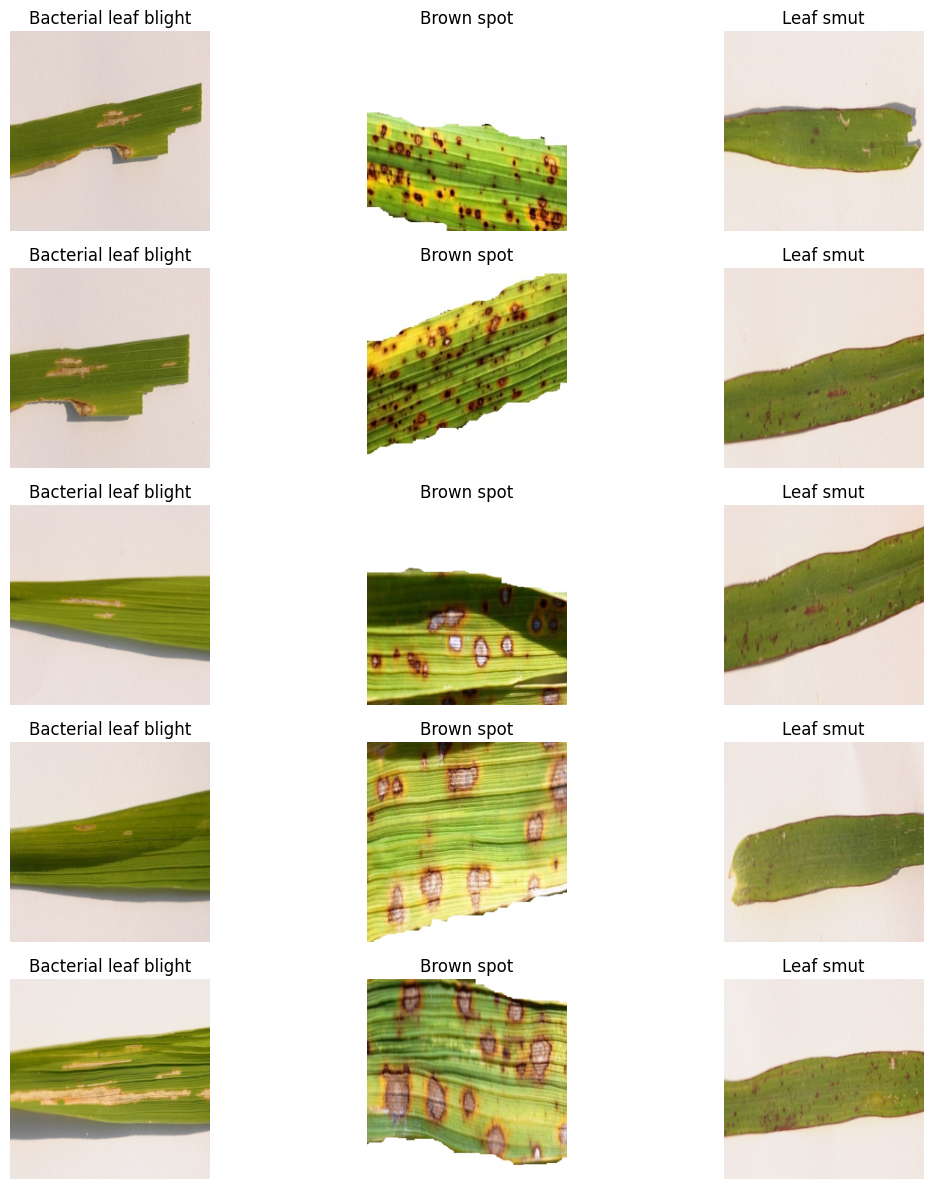

In [7]:
fig, axes = plt.subplots(nrows = no_of_samples, ncols = 3, figsize=(12,12))

for i in range(no_of_samples):
    axes[i,0].imshow(dir1_set[i][0])
    axes[i,0].set_title('Bacterial leaf blight')
    axes[i,0].axis('off')

    axes[i,1].imshow(dir2_set[i][0])
    axes[i,1].set_title('Brown spot')
    axes[i,1].axis('off')

    axes[i,2].imshow(dir3_set[i][0])
    axes[i,2].set_title('Leaf smut')
    axes[i,2].axis('off')

plt.tight_layout()
plt.show()

### Data Preprocessing

Separation of labels and images

In [8]:
x_image=[]
y_label=[]

for img, label in images_dir1:
  x_image.append(img)
  y_label.append(label)

for img, label in images_dir2:
  x_image.append(img)
  y_label.append(label)

for img, label in images_dir3:
  x_image.append(img)
  y_label.append(label)

x_image and y_label store image and respective labels belong to it disease.

 Converting image to numpy array and normalizing

In [9]:
x_image = np.array(x_image, dtype=np.float16) / 255.0
y_label = np.array(y_label)

In [10]:
print(x_image.shape)
print(y_label.shape)

(119, 224, 224, 3)
(119,)


Train Test Split


In [11]:
x_train, x_test, y_train, y_test = train_test_split(x_image,
                                                     y_label,
                                                     test_size=0.2,
                                                     random_state=42)


In [12]:
print(x_train.shape)
print(x_test.shape)
print("==================")
print(y_train.shape)
print(y_test.shape)

(95, 224, 224, 3)
(24, 224, 224, 3)
(95,)
(24,)


In [13]:
x_train[:1]

array([[[[0.847  , 0.682  , 0.2666 ],
         [0.784  , 0.6353 , 0.1451 ],
         [0.6626 , 0.5215 , 0.0863 ],
         ...,
         [1.     , 1.     , 1.     ],
         [1.     , 1.     , 1.     ],
         [1.     , 1.     , 1.     ]],

        [[0.706  , 0.5566 , 0.1255 ],
         [0.6353 , 0.4941 , 0.0353 ],
         [0.5215 , 0.396  , 0.00784],
         ...,
         [1.     , 1.     , 1.     ],
         [1.     , 1.     , 1.     ],
         [1.     , 1.     , 1.     ]],

        [[0.608  , 0.498  , 0.051  ],
         [0.5566 , 0.451  , 0.02353],
         [0.5254 , 0.447  , 0.0902 ],
         ...,
         [1.     , 1.     , 1.     ],
         [1.     , 1.     , 1.     ],
         [1.     , 1.     , 1.     ]],

        ...,

        [[1.     , 1.     , 1.     ],
         [1.     , 1.     , 1.     ],
         [1.     , 1.     , 1.     ],
         ...,
         [1.     , 1.     , 1.     ],
         [1.     , 1.     , 1.     ],
         [1.     , 1.     , 1.     ]],

        [[

Reshape the training and testing data

In [14]:
x_train = x_train.reshape(-1, 224,224,3)
x_test = x_test.reshape(-1, 224,224,3)

label encoding

In [15]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform labels in y_train and y_test to integers
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)


# Convert integer labels to one-hot encoded format
y_train = to_categorical(y_train_encoded, num_classes=3)
y_test = to_categorical(y_test_encoded, num_classes=3)

In [16]:
print(y_train.dtype)
print(y_test.dtype)

print("-----------------")

print(y_train_encoded.dtype)
print(y_test_encoded.dtype)


float32
float32
-----------------
int64
int32


## Model Building

Build Model

In [18]:

model = Sequential()

model.add(Conv2D(filters=16, activation="relu", padding="same", kernel_size=3, input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=32, activation="relu", padding="same", kernel_size=3))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=64, activation="relu", padding="same", kernel_size=3))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=128, activation="relu", padding="same", kernel_size=3))
model.add(MaxPooling2D(pool_size=2))

model.add(Flatten())
model.add(Dropout(0.4))

model.add(Dense(128, activation="relu"))
model.add(Dropout(0.4))
model.add(Dense(3, activation="softmax"))


model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 28, 28, 64)       0

Compile the model

In [19]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Fit and train the model

In [20]:
history = model.fit(x_train,
                    y_train_encoded,
                    epochs=20,
                    batch_size=32,
                    validation_data=(x_test, y_test_encoded))

Epoch 1/20


3/3 [==============================] - 4s 1s/step - loss: 1.3617 - accuracy: 0.3263 - val_loss: 1.1512 - val_accuracy: 0.4167
Epoch 2/20
3/3 [==============================] - 3s 1s/step - loss: 1.1363 - accuracy: 0.3474 - val_loss: 1.0906 - val_accuracy: 0.3333
Epoch 3/20
3/3 [==============================] - 3s 1s/step - loss: 1.0841 - accuracy: 0.4947 - val_loss: 1.0756 - val_accuracy: 0.4167
Epoch 4/20
3/3 [==============================] - 3s 1s/step - loss: 1.0857 - accuracy: 0.4000 - val_loss: 1.0600 - val_accuracy: 0.5000
Epoch 5/20
3/3 [==============================] - 3s 1s/step - loss: 1.0481 - accuracy: 0.4947 - val_loss: 1.0286 - val_accuracy: 0.5000
Epoch 6/20
3/3 [==============================] - 3s 1s/step - loss: 1.0063 - accuracy: 0.4842 - val_loss: 0.9666 - val_accuracy: 0.5417
Epoch 7/20
3/3 [==============================] - 3s 1s/step - loss: 0.9558 - accuracy: 0.5158 - val_loss: 0.9451 - val_accuracy: 0.5000
Epoch 8/20
3/3 [==============================] - 3s

Check accuracy

In [21]:
test_loss, base_model_accuracy = model.evaluate(x_test, y_test_encoded)
print(base_model_accuracy)

1/1 [==============================] - 0s 191ms/step - loss: 0.5228 - accuracy: 0.7917
0.7916666865348816


To see model output in visualization

<Figure size 640x480 with 0 Axes>

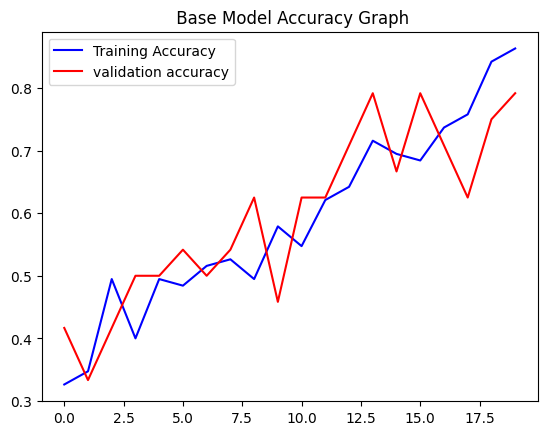

<Figure size 640x480 with 0 Axes>

In [22]:
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]

epochs = range(len(acc))
plt.plot(epochs, acc, "b", label="Training Accuracy")
plt.plot(epochs, val_acc, "r", label="validation accuracy")
plt.title(" Base Model Accuracy Graph")
plt.legend()
plt.figure()

Loss plot

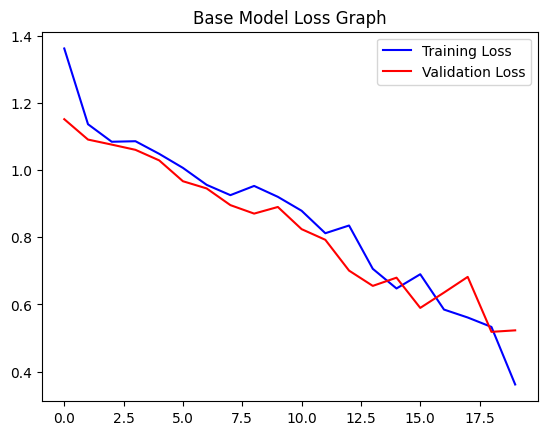

In [23]:

loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Base Model Loss Graph')
plt.legend()
plt.show()

Save Model

In [24]:
path = "D:\Internship\Rubixe\Rice Leaf Disease Detection\End-to-End-Rice-leaf-Disease-Detection\Models"
model.save(os.path.join(path, "base_model.keras"))

## Pre Trained Model

Now we will some use pre-trained model to get good accuracy.

### VGG-16

In [25]:
# Base model
vgg_model = VGG16(input_shape=(224,224,3),
                   include_top=False,
                   weights="imagenet")

# add flatten layer
x = Flatten()(vgg_model.output)

# add dense layer
x = Dense(256, activation="relu")(x)
x = Dropout(0.4)(x)
x = Dense(128, activation="relu")(x)
prediction = Dense(3, activation="softmax")(x)

model1 = Model(inputs=vgg_model.input, outputs=prediction)

for layer in vgg_model.layers[:-4]:
  layer.trainable=False

# model compile
model1.compile(optimizer=optimizers.Adam(learning_rate=0.0001),
              loss = "categorical_crossentropy",
              metrics=["accuracy"])


In [26]:

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', save_best_only=True)


In [27]:
# Fit the model
history1 = model1.fit(x_train, y_train,
                    batch_size=64,
                    epochs=20,
                    shuffle=False,
                    validation_data=(x_test,y_test),
                    callbacks=[early_stopping, model_checkpoint]
                    )



Epoch 1/20
2/2 [==============================] - 29s 13s/step - loss: 1.3944 - accuracy: 0.3474 - val_loss: 1.2230 - val_accuracy: 0.3750
Epoch 2/20
2/2 [==============================] - 28s 13s/step - loss: 1.1147 - accuracy: 0.4632 - val_loss: 0.9909 - val_accuracy: 0.5417
Epoch 3/20
2/2 [==============================] - 28s 14s/step - loss: 0.8379 - accuracy: 0.6842 - val_loss: 0.8356 - val_accuracy: 0.7500
Epoch 4/20
2/2 [==============================] - 26s 11s/step - loss: 0.6942 - accuracy: 0.7579 - val_loss: 0.6729 - val_accuracy: 0.7083
Epoch 5/20
2/2 [==============================] - 28s 13s/step - loss: 0.4605 - accuracy: 0.8737 - val_loss: 0.5077 - val_accuracy: 0.8333
Epoch 6/20
2/2 [==============================] - 28s 13s/step - loss: 0.3478 - accuracy: 0.9368 - val_loss: 0.4277 - val_accuracy: 0.8750
Epoch 7/20
2/2 [==============================] - 26s 11s/step - loss: 0.2180 - accuracy: 0.9684 - val_loss: 0.3682 - val_accuracy: 0.8750
Epoch 8/20
2/2 [===========

In [28]:
# testing the model
test_loss, vgg_test_accuracy = model1.evaluate(x_test, y_test)
train_loss, vgg_train_accuracy = model1.evaluate(x_train, y_train)

print(f"Test accuracy: {vgg_test_accuracy:.4f}")
print(f"Train accuracy: {vgg_train_accuracy:.4f}")


3/3 [==============================] - 17s 6s/step - loss: 0.0094 - accuracy: 1.0000
Test accuracy: 0.9583
Train accuracy: 1.0000


<Figure size 640x480 with 0 Axes>

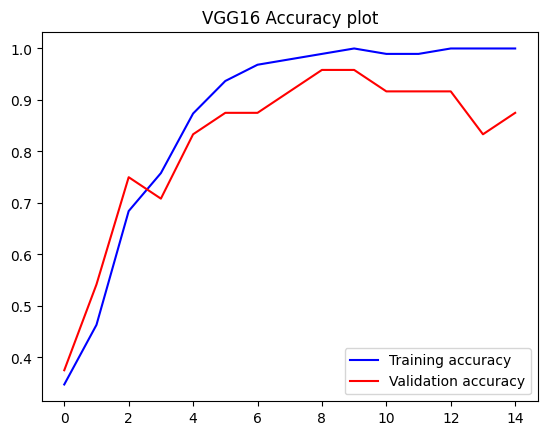

<Figure size 640x480 with 0 Axes>

In [29]:
# plotting accuracy
acc = history1.history["accuracy"]
val_acc = history1.history["val_accuracy"]

eopchs = range(len(acc))
plt.plot(eopchs, acc, "b", label="Training accuracy")
plt.plot(eopchs, val_acc, "r", label="Validation accuracy")
plt.title("VGG16 Accuracy plot")
plt.legend()
plt.figure()

In [30]:
# Save Model
model1.save(os.path.join(path, "Vgg_model.keras"))

### InceptionV3

In [31]:

# Base model
ince_model = InceptionV3(input_shape=(224,224,3),
                   include_top=False,
                   weights="imagenet")

# add flatten layer
x = Flatten()(ince_model.output)

# add dense layer
x = Dense(1024, activation="relu")(x)
x = Dropout(0.4)(x)
x = Dense(500, activation="relu")(x)
prediction = Dense(3, activation="softmax")(x)

model2 = Model(inputs=ince_model.input, outputs=prediction)

# Freeze model
for layer in ince_model.layers[:-4]:
  layer.trainable=False

# model compile
model2.compile(optimizer=optimizers.Adam(learning_rate=0.0001),
              loss = "categorical_crossentropy",
              metrics=["accuracy"])

In [32]:
# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', save_best_only=True)

In [33]:
# Fit the model
ince_history = model2.fit(x_train, y_train,
                    batch_size=64,
                    epochs=20,
                    shuffle=False,
                    validation_data=(x_test,y_test),
                    callbacks=[early_stopping, model_checkpoint]
                    )

Epoch 1/20
2/2 [==============================] - 21s 14s/step - loss: 2.5611 - accuracy: 0.2737 - val_loss: 2.5066 - val_accuracy: 0.6667
Epoch 2/20
2/2 [==============================] - 15s 12s/step - loss: 1.9752 - accuracy: 0.6632 - val_loss: 0.9741 - val_accuracy: 0.7083
Epoch 3/20
2/2 [==============================] - 5s 3s/step - loss: 0.4536 - accuracy: 0.8316 - val_loss: 2.1937 - val_accuracy: 0.4583
Epoch 4/20
2/2 [==============================] - 6s 3s/step - loss: 0.6233 - accuracy: 0.8105 - val_loss: 1.2563 - val_accuracy: 0.5833
Epoch 5/20
2/2 [==============================] - 6s 3s/step - loss: 0.2350 - accuracy: 0.9263 - val_loss: 0.4046 - val_accuracy: 0.7083
Epoch 6/20
2/2 [==============================] - 16s 13s/step - loss: 0.2177 - accuracy: 0.9263 - val_loss: 0.2369 - val_accuracy: 0.9167
Epoch 7/20
2/2 [==============================] - 6s 3s/step - loss: 0.1674 - accuracy: 0.9263 - val_loss: 0.8817 - val_accuracy: 0.7083
Epoch 8/20
2/2 [===================

In [34]:
# testing the model
test_loss, ince_test_accuracy = model2.evaluate(x_test, y_test)
train_loss, ince_train_accuracy = model2.evaluate(x_train, y_train)

print(f"Test accuracy: {ince_test_accuracy:.4f}")
print(f"Train accuracy: {ince_train_accuracy:.4f}")


3/3 [==============================] - 4s 1s/step - loss: 0.0022 - accuracy: 1.0000
Test accuracy: 0.9167
Train accuracy: 1.0000


<Figure size 640x480 with 0 Axes>

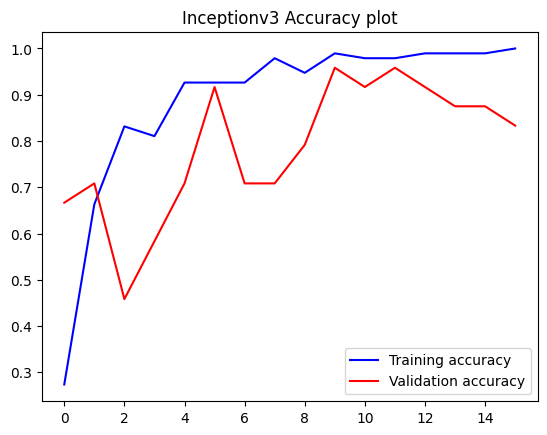

<Figure size 640x480 with 0 Axes>

In [35]:
# Plotting Accuracy
acc = ince_history.history["accuracy"]
val_acc = ince_history.history["val_accuracy"]

eopchs = range(len(acc))
plt.plot(eopchs, acc, "b", label="Training accuracy")
plt.plot(eopchs, val_acc, "r", label="Validation accuracy")
plt.title("Inceptionv3 Accuracy plot")
plt.legend()
plt.figure()

In [36]:
# Save Model
model2.save(os.path.join(path, "Inceptionv3_model.keras"))

### MobileNetV2

In [37]:
# Load model
mnv_model = MobileNetV2(weights = "imagenet",
                        include_top = False,
                        input_shape = (224,224,3))

# add custom layers
x = Flatten()(mnv_model.output)
x = Dense(128, activation="relu")(x)
x = Dropout(0.3)(x)
x = Dense(64, activation="relu")(x)

prediction = Dense(3, activation="softmax")(x)

# Combine model with layers
model3 = Model(inputs = mnv_model.input, outputs=prediction)

# Freeze the layers of the model
for layer in mnv_model.layers:
  layer.trainable=False

# Compile model
model3.compile(optimizer = optimizers.Adam(learning_rate=0.0001),
              loss = "categorical_crossentropy",
              metrics=["accuracy"])

In [38]:
# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', save_best_only=True)

In [39]:
# Fit the model
mnv_history = model3.fit(x_train, y_train,
                        batch_size=32,
                        epochs=20,
                        shuffle=False,
                        validation_data=(x_test,y_test),
                        callbacks=[early_stopping, model_checkpoint]
                        )

Epoch 1/20


3/3 [==============================] - 9s 3s/step - loss: 1.4655 - accuracy: 0.4526 - val_loss: 0.7547 - val_accuracy: 0.5417
Epoch 2/20
3/3 [==============================] - 4s 2s/step - loss: 0.5520 - accuracy: 0.8000 - val_loss: 0.3909 - val_accuracy: 0.8333
Epoch 3/20
3/3 [==============================] - 4s 2s/step - loss: 0.2654 - accuracy: 0.8842 - val_loss: 0.3243 - val_accuracy: 0.8750
Epoch 4/20
3/3 [==============================] - 3s 1s/step - loss: 0.1114 - accuracy: 0.9579 - val_loss: 0.2275 - val_accuracy: 0.8333
Epoch 5/20
3/3 [==============================] - 4s 2s/step - loss: 0.0916 - accuracy: 0.9684 - val_loss: 0.1841 - val_accuracy: 0.9583
Epoch 6/20
3/3 [==============================] - 3s 1s/step - loss: 0.0563 - accuracy: 0.9789 - val_loss: 0.1479 - val_accuracy: 0.9583
Epoch 7/20
3/3 [==============================] - 3s 1s/step - loss: 0.0217 - accuracy: 1.0000 - val_loss: 0.1245 - val_accuracy: 0.9583
Epoch 8/20
3/3 [==============================] - 3s

In [40]:
# testing the model
test_loss, mnv_test_accuracy = model3.evaluate(x_test, y_test)
train_loss, mnv_train_accuracy = model3.evaluate(x_train, y_train)

print(f"Test accuracy: {mnv_test_accuracy:.4f}")
print(f"Train accuracy: {mnv_train_accuracy:.4f}")


3/3 [==============================] - 2s 775ms/step - loss: 7.7239e-04 - accuracy: 1.0000
Test accuracy: 0.9583
Train accuracy: 1.0000


<Figure size 640x480 with 0 Axes>

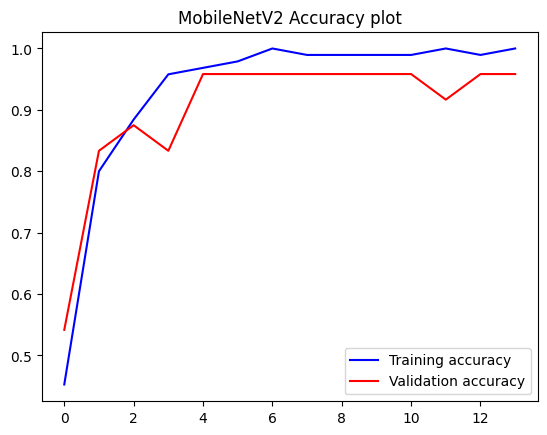

<Figure size 640x480 with 0 Axes>

In [41]:
# Plotting Accuracy
acc = mnv_history.history["accuracy"]
val_acc = mnv_history.history["val_accuracy"]

eopchs = range(len(acc))
plt.plot(eopchs, acc, "b", label="Training accuracy")
plt.plot(eopchs, val_acc, "r", label="Validation accuracy")
plt.title("MobileNetV2 Accuracy plot")
plt.legend()
plt.figure()

In [42]:
# Save Model
model3.save(os.path.join(path, "Mobilenetv2_model.keras"))

### ResNet50

In [43]:
# Load model
rn_model = ResNet50(weights = "imagenet",
                        include_top = False,
                        input_shape = (224,224,3),
                    )

# add custom layers
x = Flatten()(rn_model.output)
x = Dense(1024, activation="relu")(x)
x = Dropout(0.4)(x)
x = Dense(500, activation="relu")(x)
x = Dropout(0.3)(x)

prediction = Dense(3, activation="softmax")(x)

# Combine model with layers
model4 = Model(inputs = rn_model.input, outputs=prediction)

# Freeze the layers of the model
for layer in rn_model.layers[:-5]:
  layer.trainable=False

# Compile model
model4.compile(optimizer = optimizers.Adam(learning_rate=0.0001),
              loss = "categorical_crossentropy",
              metrics=["accuracy"])

In [44]:
# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', save_best_only=True)

In [45]:
# Fit the model
rn_history = model4.fit(x_train, y_train,
                        batch_size=32,
                        epochs=20,
                        shuffle=False,
                        validation_data=(x_test,y_test),
                        callbacks=[early_stopping, model_checkpoint]
                        )


Epoch 1/20


3/3 [==============================] - 44s 18s/step - loss: 4.8356 - accuracy: 0.3263 - val_loss: 1.7882 - val_accuracy: 0.3333
Epoch 2/20
3/3 [==============================] - 38s 17s/step - loss: 1.9628 - accuracy: 0.4105 - val_loss: 1.2941 - val_accuracy: 0.3750
Epoch 3/20
3/3 [==============================] - 13s 5s/step - loss: 2.9086 - accuracy: 0.2842 - val_loss: 1.2642 - val_accuracy: 0.2917
Epoch 4/20
3/3 [==============================] - 11s 4s/step - loss: 2.1770 - accuracy: 0.4105 - val_loss: 1.1474 - val_accuracy: 0.2917
Epoch 5/20
3/3 [==============================] - 10s 4s/step - loss: 1.7296 - accuracy: 0.4632 - val_loss: 1.1835 - val_accuracy: 0.3750
Epoch 6/20
3/3 [==============================] - 14s 5s/step - loss: 1.9062 - accuracy: 0.4000 - val_loss: 1.1384 - val_accuracy: 0.2917
Epoch 7/20
3/3 [==============================] - 13s 5s/step - loss: 1.5396 - accuracy: 0.4526 - val_loss: 1.1934 - val_accuracy: 0.2917
Epoch 8/20
3/3 [===========================

In [46]:
# testing the model
test_loss, rn_test_accuracy = model4.evaluate(x_test, y_test)
train_loss, rn_train_accuracy = model4.evaluate(x_train, y_train)

print(f"Test accuracy: {rn_test_accuracy:.4f}")
print(f"Train accuracy: {rn_train_accuracy:.4f}")


3/3 [==============================] - 8s 3s/step - loss: 1.0561 - accuracy: 0.4000
Test accuracy: 0.2917
Train accuracy: 0.4000


<Figure size 640x480 with 0 Axes>

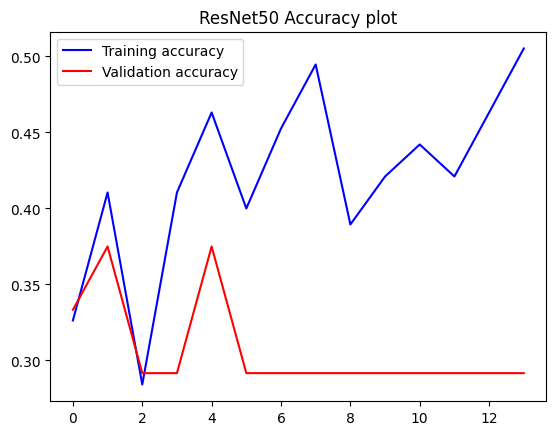

<Figure size 640x480 with 0 Axes>

In [47]:
# Plotting Accuracy
acc = rn_history.history["accuracy"]
val_acc = rn_history.history["val_accuracy"]

eopchs = range(len(acc))
plt.plot(eopchs, acc, "b", label="Training accuracy")
plt.plot(eopchs, val_acc, "r", label="Validation accuracy")
plt.title("ResNet50 Accuracy plot")
plt.legend()
plt.figure()

In [48]:
# Save Model
model4.save(os.path.join(path, "Resnet50_model.keras"))

### EfficientNetB7

In [49]:
# Load model
enb_model = EfficientNetB7(weights = "imagenet",
                        include_top = False,
                        input_shape = (224,224,3))

# add custom layers
x = Flatten()(enb_model.output)
x = Dense(1024, activation="relu")(x)
x = Dropout(0.3)(x)
x = Dense(500, activation="relu")(x)
prediction = Dense(3, activation="softmax")(x)

# Combine model with layers
model5 = Model(inputs = enb_model.input, outputs=prediction)

# Freeze the layers of the model
for layer in enb_model.layers:
  layer.trainable=False

# Compile model
model5.compile(optimizer = optimizers.Adam(learning_rate=0.0001),
              loss = "categorical_crossentropy",
              metrics=["accuracy"])


In [ ]:
model5.summary()

In [50]:

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', save_best_only=True)

In [53]:
# Fit the model
enb_history = model5.fit(x_train, y_train,
                        batch_size=32,
                        epochs=20,
                        shuffle=False,
                        validation_data=(x_test,y_test),
                        callbacks=[early_stopping, model_checkpoint]
                        )

Epoch 1/20
3/3 [==============================] - 43s 16s/step - loss: 5.7868 - accuracy: 0.3579 - val_loss: 1.2863 - val_accuracy: 0.2917
Epoch 2/20
3/3 [==============================] - 40s 15s/step - loss: 5.7913 - accuracy: 0.2211 - val_loss: 3.1675 - val_accuracy: 0.2917
Epoch 3/20
3/3 [==============================] - 42s 15s/step - loss: 3.4523 - accuracy: 0.4211 - val_loss: 6.0317 - val_accuracy: 0.3750
Epoch 4/20
3/3 [==============================] - 44s 17s/step - loss: 3.9638 - accuracy: 0.3474 - val_loss: 1.5236 - val_accuracy: 0.2917
Epoch 5/20
3/3 [==============================] - 48s 18s/step - loss: 3.5114 - accuracy: 0.3263 - val_loss: 2.6036 - val_accuracy: 0.2917
Epoch 6/20
3/3 [==============================] - 45s 17s/step - loss: 3.1245 - accuracy: 0.3158 - val_loss: 2.7246 - val_accuracy: 0.3750


In [54]:
# testing the model
test_loss, enb_test_accuracy = model5.evaluate(x_test, y_test)
train_loss, enb_train_accuracy = model5.evaluate(x_train, y_train)

print(f"Test accuracy: {enb_test_accuracy:.4f}")
print(f"Train accuracy: {enb_train_accuracy:.4f}")


3/3 [==============================] - 31s 10s/step - loss: 1.2357 - accuracy: 0.3474
Test accuracy: 0.2917
Train accuracy: 0.3474


<Figure size 640x480 with 0 Axes>

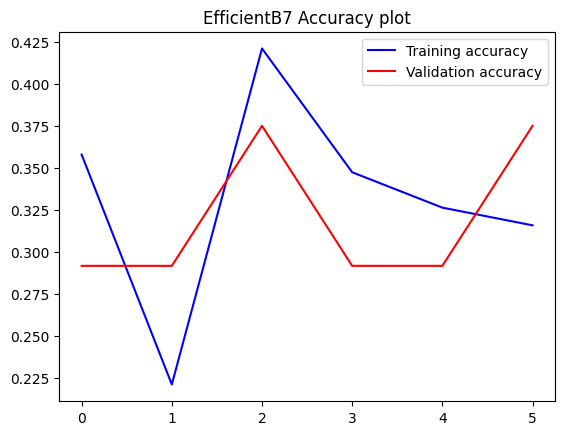

<Figure size 640x480 with 0 Axes>

In [55]:
# Plotting Accuracy
acc = enb_history.history["accuracy"]
val_acc = enb_history.history["val_accuracy"]

eopchs = range(len(acc))
plt.plot(eopchs, acc, "b", label="Training accuracy")
plt.plot(eopchs, val_acc, "r", label="Validation accuracy")
plt.title("EfficientB7 Accuracy plot")
plt.legend()
plt.figure()

In [56]:
model5.save_weights(os.path.join(path, "Efficientb7_model_weights.keras"))

Best Model

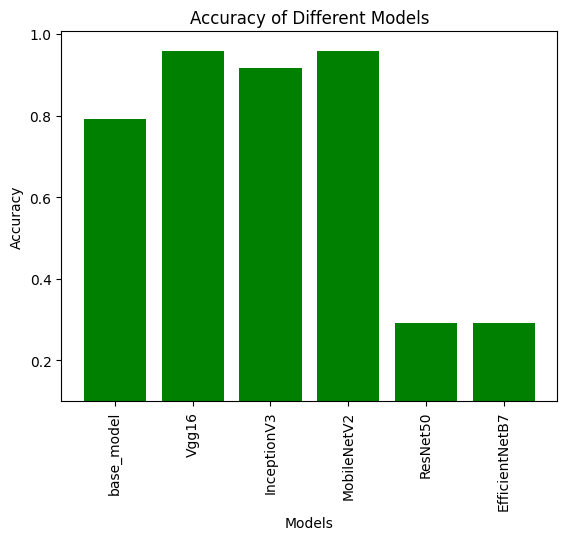

In [57]:
# plot bar graph to see best model performance
Models = ["base_model", "Vgg16", "InceptionV3", "MobileNetV2", "ResNet50", "EfficientNetB7" ]

accuracies = [
            base_model_accuracy,
            vgg_test_accuracy,
            ince_test_accuracy,
            mnv_test_accuracy,
            rn_test_accuracy,
            enb_test_accuracy
             ]

plt.bar(Models, accuracies, color="green")
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Accuracy of Different Models")
plt.xticks(rotation=90)
plt.ylim(0.1)
plt.show()  


Above all plot and accuracy we can clearly say that MobileNetv2 is best predition model for rice leaf diseases detection.

So we save that model as a final model

In [1]:
# Save The best model with High Accuracy and low loss for prediction
model3.save(os.path.join(path, "Final_predication_model.keras"))

NameError: name 'model3' is not defined